In [59]:
# Importing the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima 
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse  

In [60]:
# Importing the dataset and formatting it

csv_name = 'sample.csv'
target_column = 'Gold Rate'

df = pd.read_csv(csv_name)

# Preprocess the data if monthly,year format
df['Month'] = df['Month'].str.capitalize().map({
    'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
    'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
})
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), format='%Y-%m')
df.set_index('Date', inplace=True)
df.to_csv('sample_modified.csv')

# Preprocess the data if quarterly,year format
# csv_name = 'sales.csv'
# target_column = 'Sales'
# # Read the data
# df = pd.read_csv(csv_name)

# df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-Q' + df['Quarter'].astype(str))
# df.set_index('Date', inplace=True)
# df.to_csv('sales_modified.csv')

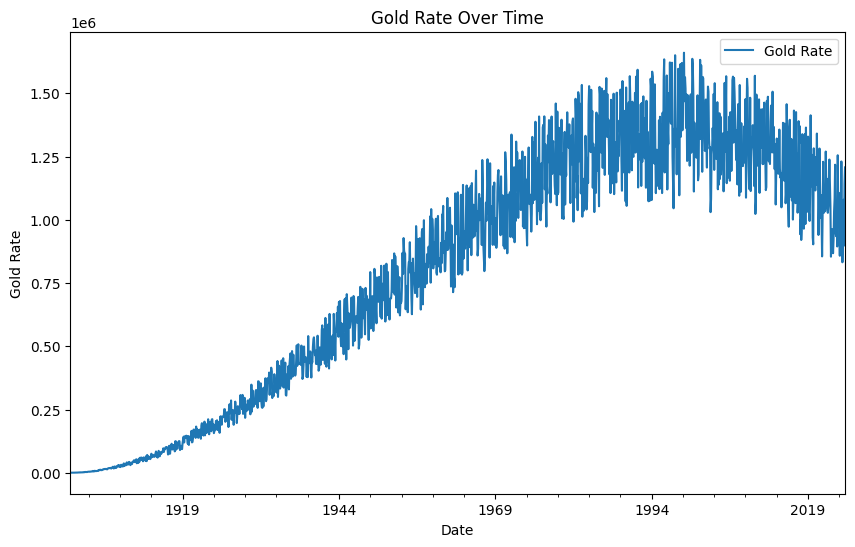

In [50]:
# Processing and plotitng the data

csv_name = 'sample_modified.csv';
index_col = 'Date';
time_series_column = 'Gold Rate';
# Read the AirPassengers dataset 
data = pd.read_csv(csv_name, 
					index_col = index_col, 
					parse_dates = True) 

# Print the first five rows of the dataset 
data.head() 

# Plot the time series column against the index column
data.plot(y=time_series_column, figsize=(10, 6))
plt.title(time_series_column + ' Over Time')
plt.xlabel(index_col)
plt.ylabel(time_series_column)
plt.show()

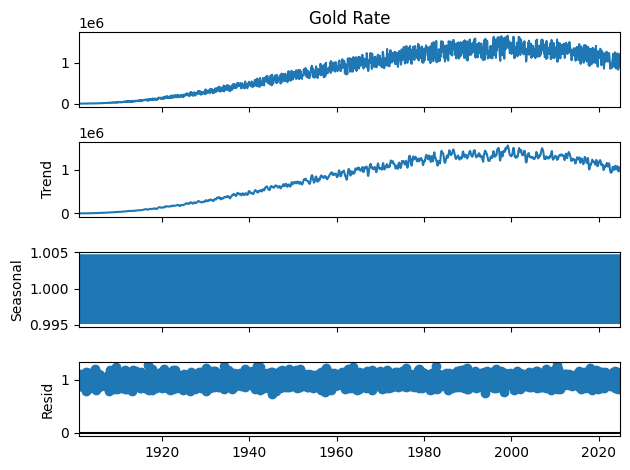

In [61]:
# ETS Decomposition and model_type = 'multiplicative' or 'additive'
model_type = 'multiplicative'
result = seasonal_decompose(data[time_series_column], 
							model = model_type,period = 4) 

# ETS plot 
result.plot() 
plt.show()

In [71]:
model = auto_arima(df[target_column], start_p = 0, start_q = 0,d=1,D=1,max_p = 5, max_q = 5, m = 12, start_P = 0, seasonal = True,trace = True,
                          error_action ='ignore', # we don't want to know if an order does not work
                          suppress_warnings = True, # we don't want convergence warnings
                          stepwise = True)# set to stepwise
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=40277.575, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=39511.888, Time=0.39 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=39833.221, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=39391.829, Time=2.09 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.21 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=39752.325, Time=1.47 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=39215.229, Time=2.81 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=39322.763, Time=0.88 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=5.18 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.48 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=39149.237, Time=3.62 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AI

Forecasted values: 2025-01-01    9.804249e+05
2025-02-01    9.563749e+05
2025-03-01    1.073929e+06
2025-04-01    1.060370e+06
2025-05-01    1.236346e+06
2025-06-01    1.101098e+06
2025-07-01    9.776108e+05
2025-08-01    1.037393e+06
2025-09-01    9.676782e+05
2025-10-01    1.044539e+06
Freq: MS, dtype: float64


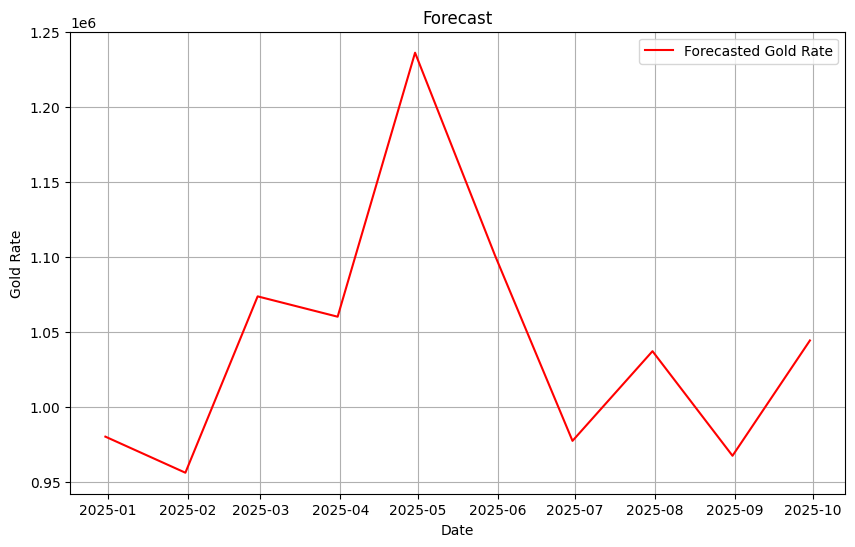

In [72]:
forecast = model.predict(n_periods=10)
print("Forecasted values:", forecast)
# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(pd.date_range(start=df.index[-1], periods=10, freq='M'), forecast, label='Forecasted Gold Rate', color='red')
plt.xlabel('Date')
plt.ylabel(target_column)
plt.title('Forecast')
plt.legend()
plt.grid(True)
plt.show()

Test RMSE: 51156.67855816103


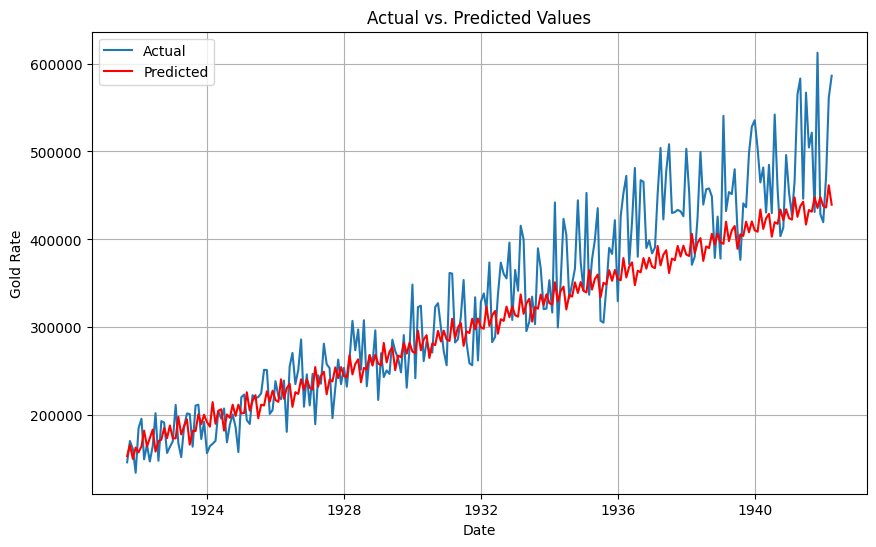

In [65]:
tscv = TimeSeriesSplit(n_splits=5)
train_index, test_index = next(tscv.split(data))
train, test = data.iloc[train_index], data.iloc[test_index]

model_fit = model.fit(train[time_series_column])

# Make predictions
predictions = model_fit.predict(n_periods=len(test))

# Calculate RMSE for evaluation
rmse = np.sqrt(mean_squared_error(test[time_series_column], predictions))
print(f'Test RMSE: {rmse}')

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test[time_series_column], label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.xlabel(index_col)
plt.ylabel(time_series_column)
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

Forecasted values: 2025-01-01    9.804249e+05
2025-02-01    9.563749e+05
2025-03-01    1.073929e+06
2025-04-01    1.060370e+06
2025-05-01    1.236346e+06
2025-06-01    1.101098e+06
2025-07-01    9.776108e+05
2025-08-01    1.037393e+06
2025-09-01    9.676782e+05
2025-10-01    1.044539e+06
Freq: MS, dtype: float64


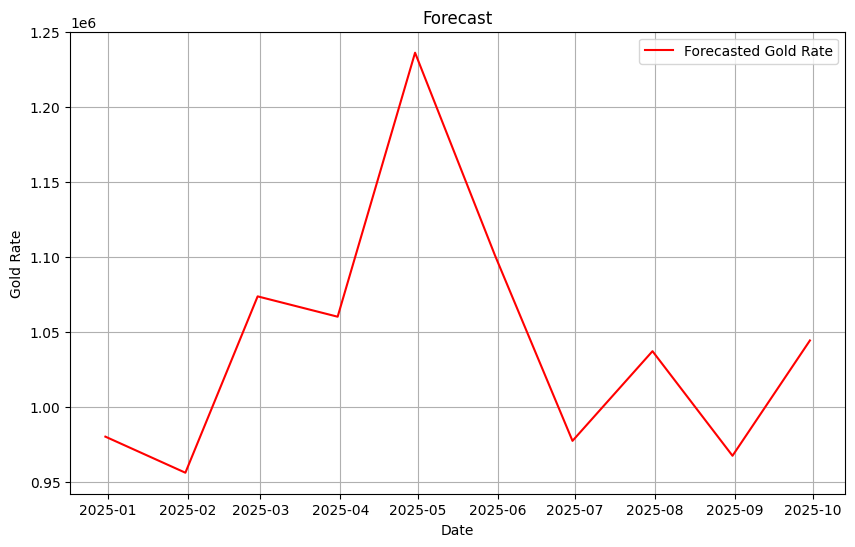

In [73]:
forecast = model.predict(n_periods=10)
print("Forecasted values:", forecast)
# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(pd.date_range(start=df.index[-1], periods=10, freq='M'), forecast, label='Forecasted Gold Rate', color='red')
plt.xlabel('Date')
plt.ylabel(target_column)
plt.title('Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
train = data.iloc[:len(data)-12] 
test = data.iloc[len(data)-12:] 

model = SARIMAX(train[time_series_column], 
				order = (5, 1, 0), 
				seasonal_order =(2, 1, 0, 12)) 

result = model.fit()
# print(result.summary())

Start: 1476   End: 1487


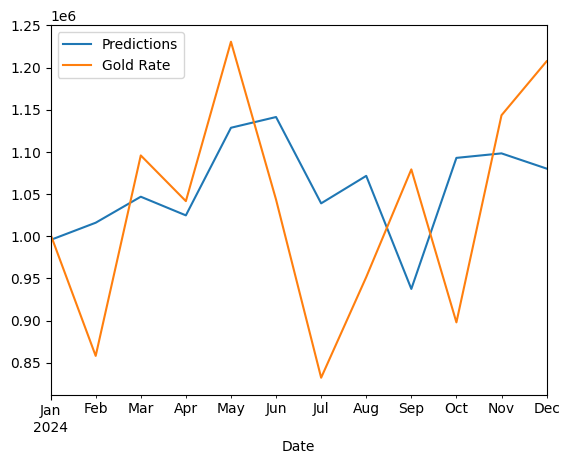

In [74]:
start = len(train) 
end = len(train) + len(test) - 1
print("Start:",start , " " , "End:" , end)
# # Predictions for one-year against the test set 
predictions = result.predict(start, end, 
							typ = 'levels').rename("Predictions") 

# # plot predictions and actual values 
predictions.plot(legend = True) 
test[time_series_column].plot(legend = True) 
plt.show()

In [69]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming `test[time_series_column]` and `predictions` are your actual and predicted values

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test[time_series_column], predictions)
print(f"Mean Squared Error: {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 15096625235.405655
Root Mean Squared Error: 122868.32478472902


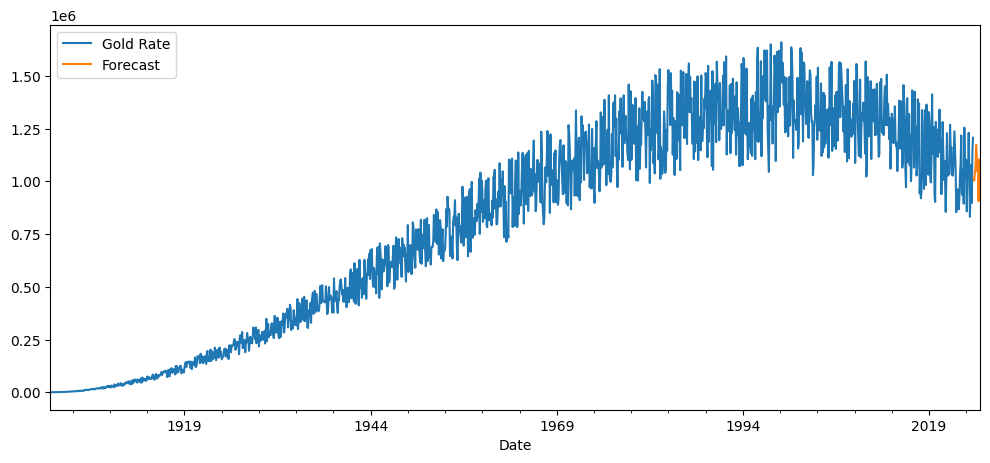

2025-01-01    1.016338e+06
2025-02-01    1.004088e+06
2025-03-01    1.046288e+06
2025-04-01    1.062609e+06
2025-05-01    1.173359e+06
2025-06-01    1.118742e+06
2025-07-01    1.048643e+06
2025-08-01    1.069947e+06
2025-09-01    9.068563e+05
2025-10-01    1.105712e+06
2025-11-01    1.048315e+06
2025-12-01    1.060253e+06
Freq: MS, Name: Forecast, dtype: float64


In [70]:
# Forecast for the next 3 years 
forecast = result.predict(start = len(data), 
						end = (len(data)-1) +  12, 
						typ = 'levels').rename('Forecast') 

# Plot the forecast values 
data[time_series_column].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True)
plt.show()
print(forecast)